In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from logo import Logo
import logo_comparison
from logo_comparison import *

import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Loading the data
data_dfs = dict()

In [88]:
for i in [1]:

    applicant_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/applicant_{i}'
    applicant_logo_names = os.listdir(applicant_loc)
    applicant_logos = list()

    previous_loc = f'/Users/aaronrasin/Desktop/Logo/Logos/previous_{i}'
    previous_logo_names = os.listdir(previous_loc)
    previous_logos = list()
    
    
    # Analyzing logo individually
    print(f"Initializing applicant logos (Test Set {i})")
    for applicant in tqdm(applicant_logo_names):
        if applicant != '.DS_Store':
            applicant_logos.append(Logo(applicant_loc + '/' + applicant))
            
    print(f"Initializing previous logos (Test Set {i})")
    for previous in tqdm(previous_logo_names):
        if previous != '.DS_Store':
            previous_logos.append(Logo(previous_loc + '/' + previous))
    
    
    # Comparing applicants and previous logos
    df = compare_logos(applicant_logos, previous_logos)
    
    # Scale the similarity scores (SSIM, Color, and Template)
#     df = scale_scores(df, features = ['SSIM', 'Color Similarity Score', 'Template Matching'])
    
    data_dfs[f'df{i}'] = df

Initializing applicant logos (Test Set 1)


100%|███████████████████████████████████████████| 24/24 [00:53<00:00,  2.24s/it]


Initializing previous logos (Test Set 1)


100%|███████████████████████████████████████████| 35/35 [00:39<00:00,  1.12s/it]


Comparing logos


100%|███████████████████████████████████████████| 23/23 [06:15<00:00, 16.32s/it]


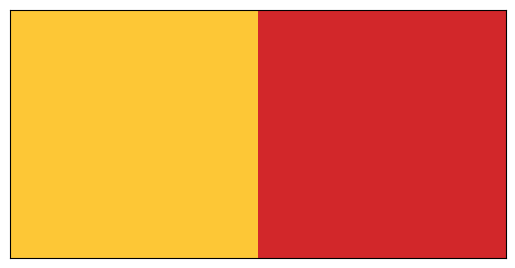

{(253, 199, 54): 0.8813737418427166, (210, 39, 42): 0.11862625815728349}

In [89]:
dhl_f = applicant_logos[13]
dhl_f.show_colors()
dhl_f.colors

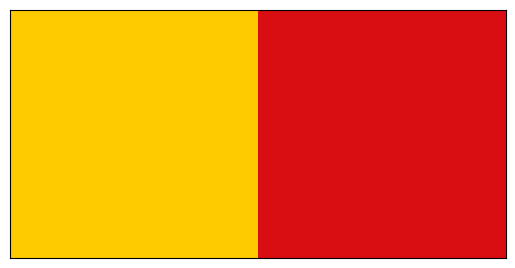

{(254, 202, 0): 0.8893173758865248, (216, 14, 18): 0.11068262411347518}

In [90]:
dhl = previous_logos[25]
dhl.show_colors()
dhl.colors

In [91]:
logo_comparison.calculate_color_similarity(dhl, dhl_f)

3.9961453553514032

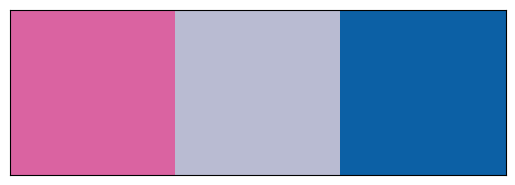

{(218, 99, 161): 0.47505841714924313,
 (185, 187, 210): 0.17017169562125367,
 (12, 96, 165): 0.3547698872295032}

In [128]:
previous_logos[5].show_colors()
previous_logos[5].colors

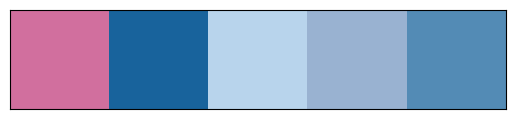

{(209, 111, 158): 0.14986945169712793,
 (24, 99, 156): 0.42402088772845953,
 (184, 212, 236): 0.15926892950391644,
 (153, 178, 209): 0.12610966057441253,
 (83, 139, 181): 0.14073107049608355}

In [127]:
applicant_logos[7].show_colors()
applicant_logos[7].colors

In [122]:
logo_comparison.calculate_color_similarity(previous_logos[5], applicant_logos[7])

38.06257474555455

In [107]:
logo_comparison.calculate_color_similarity(ikea, dhl_f)

43.87654913131198

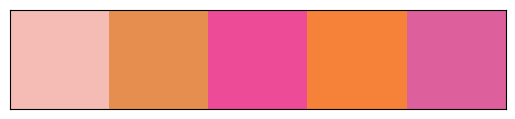

{(244, 188, 180): 0.16085616993676016,
 (230, 142, 80): 0.17285552132317172,
 (237, 74, 151): 0.2709583265769418,
 (245, 130, 56): 0.2605805091616669,
 (221, 95, 155): 0.13474947300145937}

In [93]:
dd_f = applicant_logos[0]
dd_f.show_colors()
dd_f.colors

In [95]:
dd = previous_logos[28]

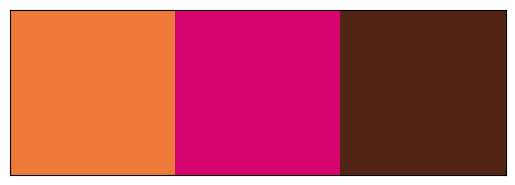

{(237, 122, 56): 0.5198882739357575,
 (214, 4, 111): 0.40640355868204625,
 (82, 36, 22): 0.07370816738219624}

In [97]:

# dd.colors = dd.color_detect(include_white = True)
dd.show_colors()
dd.colors

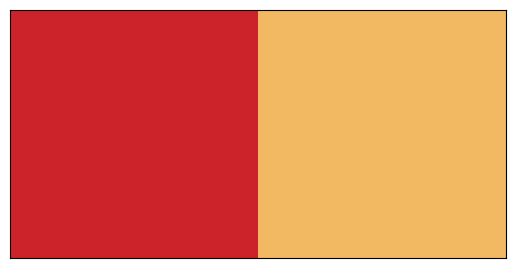

{(203, 35, 41): 0.7987322951717661, (243, 185, 98): 0.20126770482823383}

In [98]:
mcd_f = applicant_logos[2]
mcd_f.show_colors()
mcd_f.colors

In [99]:
logo_comparison.calculate_color_similarity(dd, dd_f)

11.293426975532688

In [100]:
logo_comparison.calculate_color_similarity(dd, mcd_f)

20.033789573550052

In [ ]:
df3 = data_dfs['df3']
df3

In [ ]:
# df.to_excel('/Users/aaronrasin/Desktop/Logo/LogoComparisonData.xlsx', index=False)

In [ ]:
df1

In [ ]:
df1 = list(data_dfs.values())[1]

prev_color = df1[['Previous Logo', 'Color Similarity Score']]
appl_color = df1[['Applicant Logo', 'Color Similarity Score']]
thing = (appl_color.groupby('Applicant Logo')
         .max()
         .reset_index()
         .merge(prev_color)
         .drop_duplicates()
         .iloc[:50])

thing.sort_values('Color Similarity Score', ascending=False)


In [ ]:
dd_colors = applicant_logos[29].color_detect()

In [ ]:
dd_colors

In [ ]:
plt.imshow([list(dd_colors.keys())])
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
bridgestone = applicant_logos[0]
bridgestone.color_detect(include_white=True)
bridgestone.show_colors()

In [ ]:
previous_logos[4].colors = previous_logos[4].color_detect(include_white=True)
# previous_logos[4].show_colors()


In [ ]:
for logo in applicant_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

In [ ]:
for logo in previous_logos:
    print(logo.name, logo.colors)
    logo.show_colors()

In [ ]:
previous_logos[29].colors = previous_logos[29].color_detect(include_white=True)
previous_logos[29].colors

In [ ]:
previous_logos[7].colors = previous_logos[7].color_detect(include_white=False)
previous_logos[7].colors

In [ ]:
for logo in previous_logos:
    print(logo.name)
    logo.show_colors()

# Time Complexity

- 1-2 seconds to initialize each logo (1.5 on average)
- 1-2 seconds to compare two logos (1.5 on average)
- So runtime of whole program can be calculated using this formula (plug in number of applicants (a) and number of previous (p))

$$\large \text{number of minutes} \approx \frac {(a+p) + (a \cdot p)}{60}$$

## Template matching should be scaled! 
The first DataFrame shows how inaccurate template matching is when a single threshold is set for all pairs. However, when you look at the highest template matching score for each applicant logo, results are significantly better. 

### Top 16 Template Matches (3 actual matches)

In [ ]:
df4 = data_dfs['df4']
df4[['Applicant Logo', 'Template Matching', 'Previous Logo']].sort_values('Template Matching', ascending = False).iloc[:16]

### Highest Template Match for each of 16 applicants (7 actual matches)

In [ ]:
prev_template = df4[['Previous Logo', 'Template Matching']]
appl_template = df4[['Applicant Logo', 'Template Matching']]
appl_template.groupby('Applicant Logo').max().reset_index().merge(prev_template)

In [ ]:
for logo in previous_logos:
    print(logo.name, logo.text)

In [ ]:
applicant_logos[6].colors

In [ ]:
logoA = applicant_logos[5]
logoA

In [ ]:
test

In [ ]:
calculate_logo_shape_complexity_similarity(logoA, test)

In [ ]:
plt.imshow(ck.image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
ck = applicant_logos[15]

In [ ]:
resized = imutils.resize(ck.image, width=300)

# Blurring the image
ck.blurred = cv2.GaussianBlur(resized, (5,5), 0)

# Setting all pixels to white or black
binary_image = ck.image_to_binary()

plt.imshow(binary_image, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [129]:
logoA = dd
logoB = dd_f

In [130]:
logoA.colors, logoB.colors

({(237, 122, 56): 0.5198882739357575,
  (214, 4, 111): 0.40640355868204625,
  (82, 36, 22): 0.07370816738219624},
 {(244, 188, 180): 0.16085616993676016,
  (230, 142, 80): 0.17285552132317172,
  (237, 74, 151): 0.2709583265769418,
  (245, 130, 56): 0.2605805091616669,
  (221, 95, 155): 0.13474947300145937})

In [ ]:
if len(logoA.colors.keys()) >= len(logoB.colors.keys()):
    short = logoA.colors
    long = logoB.colors
else:
    short = logoB.colors
    long = logoA.colors
    
# Define a dictionary with column A 
data1 = {'short_color': list(logoA.colors)}  
     
# Define another dictionary with column B 
data2 = {'B': ['a', 'b', 'c']}   
   
# Convert the dictionary into DataFrame   
df = pd.DataFrame(data1, index =[0, 1]) 
   
# Convert the dictionary into DataFrame   
df1 = pd.DataFrame(data2, index =[2, 3, 4])  
  
# Now to perform cross join, we will create 
# a key column in both the DataFrames to  
# merge on that key. 
df['key'] = 1
df1['key'] = 1
  
# to obtain the cross join we will merge  
# on the key and drop it. 
result = pd.merge(df, df1, on ='key').drop("key", 1) 
  
result 